In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [99]:
x = pd.read_csv("0_x.csv", header=None)

In [100]:
y = pd.read_csv("0_y.csv", header=None)

In [101]:
x.head()

,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


In [102]:
y.head()

,0
0,63.320498
1,-23.426394
2,11.982771
3,-102.883304
4,-49.373475


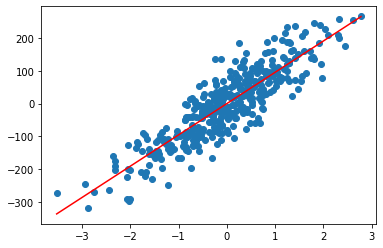

In [103]:
binary = LinearRegression()
binary.fit(x[[1]], y)
binary.coef_
binary.predict(x[[1]])
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [104]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y) #коэф детерминации от 0 до единицы
#наше значение очень близко к единице следовательно линия проведена наиболее четким образом

0.9922198026415868

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [105]:
def linear(x, y):
  binary = LinearRegression()
  binary.fit(x, y)
  binary.coef_
  binary.predict(x)
  plt.scatter(x, y)
  xx = np.linspace(x.min(), x.max(), 100).reshape((-1, 1))
  plt.plot(xx, binary.predict(xx), c='r')
  return binary.score(x, y)


0.7699743283650629

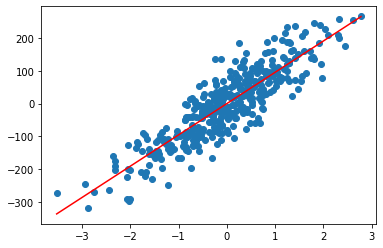

In [106]:
linear(x[[1]], y)

0.18794528514998887

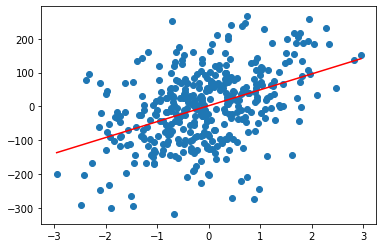

In [107]:
linear(x[[2]], y)

0.047470345664983093

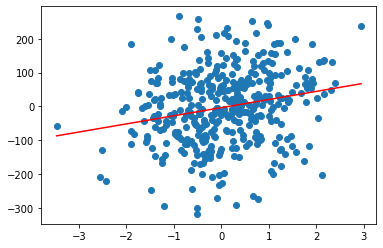

In [108]:
linear(x[[3]], y)

0.00017176151145947838

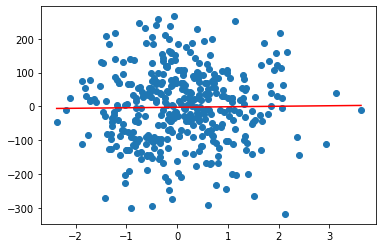

In [109]:
linear(x[[4]], y)

2. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [110]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import d2_absolute_error_score

#В полиноминальной регрессии степени порядков используются для показания зависимости элементов
#2й порядой отвечает за квадратичную зависимость
data = {2:[], 3:[], 10:[]}
data1 = {2:[], 3:[], 10:[]}
data2 = {2:[], 3:[], 10:[]}
time_dict = {2:[], 3:[], 10:[]}
def poly_plot(x,y,degree = 2):
  start = time.time()
  poly_features = PolynomialFeatures(degree=degree)  #метод PolynomialFeatures сделает из признака полиноминальный признак с заданным порядком
  X_poly = poly_features.fit_transform(x)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y) #обучаем модель на новом x с степенью
  X_new=np.linspace(-3, 3, len(x)).reshape(len(x), 1)
  X_new_poly = poly_features.transform(X_new)
  y_new = lin_reg.predict(X_new_poly)
  plt.plot(x, y, "b.")
  plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
  plt.xlabel("$x$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.legend(loc="upper left", fontsize=14)
  plt.axis([-3, 3, -300, 300])
  plt.show()
  y = y[0].tolist()
  y_new = y_new.reshape(len(y),)
  r2 = r2_score(y, y_new)
  evs = explained_variance_score(y, y_new)
  d2 = d2_absolute_error_score(y,y_new)
  data[degree].append(r2)
  data1[degree].append(evs)
  data2[degree].append(d2)
  stop = time.time() - start
  time_dict[degree].append(stop)
  print(f'Точность r2 {r2}')
  print(f'Точность explained_variance_score {evs}')
  print(f'Точность d2 {d2}')
  print(f'Время исполнения {stop}')

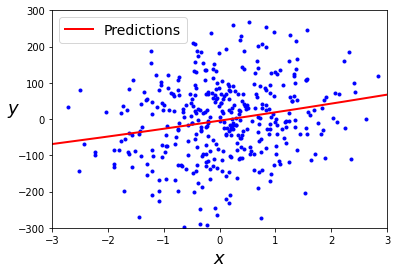

Точность r2 -0.14260734949241938
Точность explained_variance_score -0.14252334778525255
Точность d2 -0.07500553059031967
Время исполнения 0.17333531379699707


In [111]:
poly_plot(x[[0]],y,2)

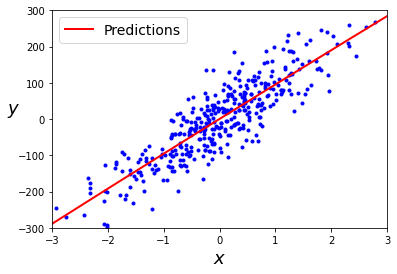

Точность r2 -2.3391303472149847
Точность explained_variance_score -2.338917472154267
Точность d2 -0.9295994819957216
Время исполнения 0.17843914031982422


In [112]:
poly_plot(x[[1]],y,2)

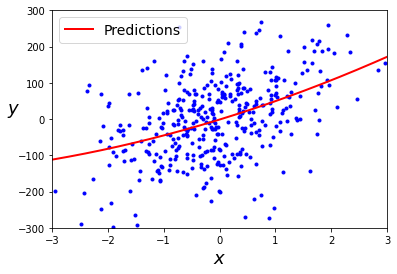

Точность r2 -0.608021745593629
Точность explained_variance_score -0.5973545921785377
Точность d2 -0.284812040203398
Время исполнения 0.19686341285705566


In [113]:
poly_plot(x[[2]],y,2)

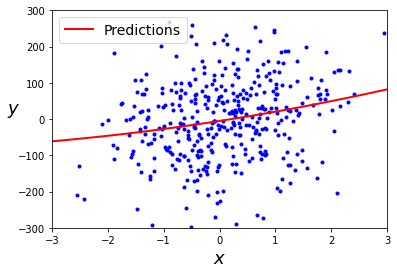

Точность r2 -0.1602108545112113
Точность explained_variance_score -0.15980189724848426
Точность d2 -0.08135549791036567
Время исполнения 0.17785286903381348


In [114]:
poly_plot(x[[3]],y,2)

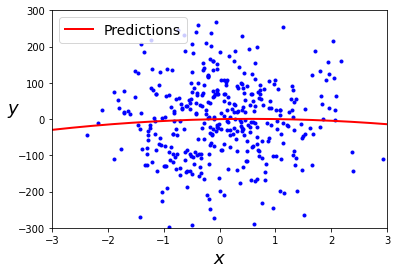

Точность r2 -0.006630483785005081
Точность explained_variance_score -0.004368208213140212
Точность d2 -0.00222633640474168
Время исполнения 0.18357586860656738


In [115]:
poly_plot(x[[4]],y,2)

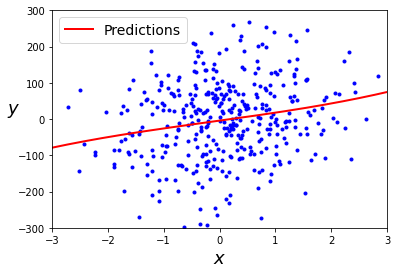

Точность r2 -0.15537638449816837
Точность explained_variance_score -0.15522170562127302
Точность d2 -0.08201319131129092
Время исполнения 0.18166661262512207


In [116]:
poly_plot(x[[0]],y,3)

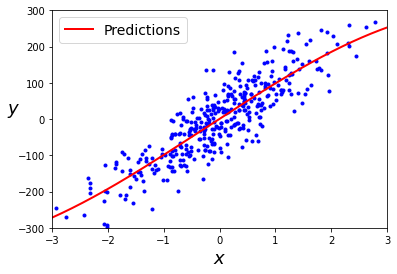

Точность r2 -2.2033536700148826
Точность explained_variance_score -2.2033399003654752
Точность d2 -0.8954474740862468
Время исполнения 0.18392443656921387


In [117]:
poly_plot(x[[1]],y,3)

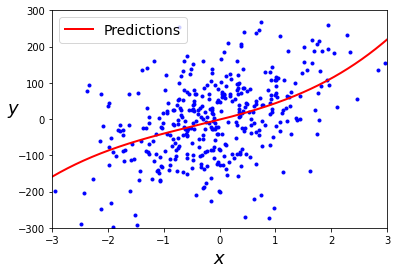

Точность r2 -0.7719648042933056
Точность explained_variance_score -0.7615447000318112
Точность d2 -0.3492894614259201
Время исполнения 0.19283318519592285


In [118]:
poly_plot(x[[2]],y,3)

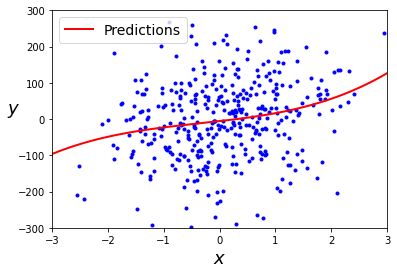

Точность r2 -0.23670671457567494
Точность explained_variance_score -0.23570470962767787
Точность d2 -0.11955307292417894
Время исполнения 0.17486357688903809


In [119]:
poly_plot(x[[3]],y,3)

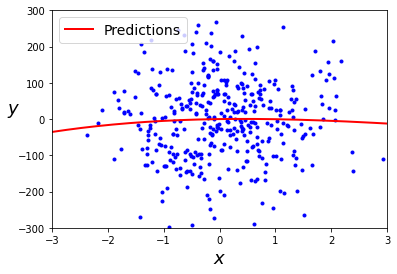

Точность r2 -0.008125066405924919
Точность explained_variance_score -0.005356807500666028
Точность d2 -0.0032261052678634883
Время исполнения 0.18155956268310547


In [120]:
poly_plot(x[[4]],y,3)

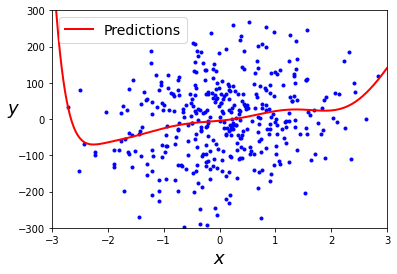

Точность r2 -0.42371146634216617
Точность explained_variance_score -0.4099813970379771
Точность d2 -0.17002387626471505
Время исполнения 0.32565975189208984


In [121]:
poly_plot(x[[0]],y,10)

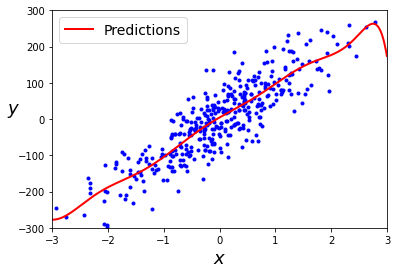

Точность r2 -2.256285204840338
Точность explained_variance_score -2.256066285693869
Точность d2 -0.9040436020489022
Время исполнения 0.17985796928405762


In [122]:
poly_plot(x[[1]],y,10)

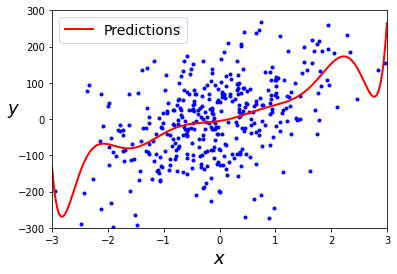

Точность r2 -0.8593673159486364
Точность explained_variance_score -0.8593238269263255
Точность d2 -0.3791197777135824
Время исполнения 0.20470952987670898


In [123]:
poly_plot(x[[2]],y,10)

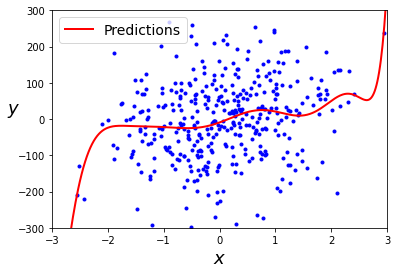

Точность r2 -1.6601871015663825
Точность explained_variance_score -1.6066572913633403
Точность d2 -0.44918759548657494
Время исполнения 0.22226476669311523


In [124]:
poly_plot(x[[3]],y,10)

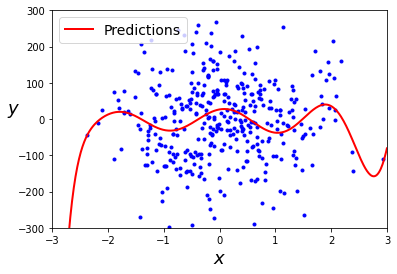

Точность r2 -3.5999814830529973
Точность explained_variance_score -3.2880649421105916
Точность d2 -0.5484895474532512
Время исполнения 0.5633575916290283


In [125]:
poly_plot(x[[4]],y,10)

Повышение степени в модели может привести к увеличению ее сложности и гибкости, это поможет лучше анализировать полученные данные. Но в то же время может привести к переобучени модели

3. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

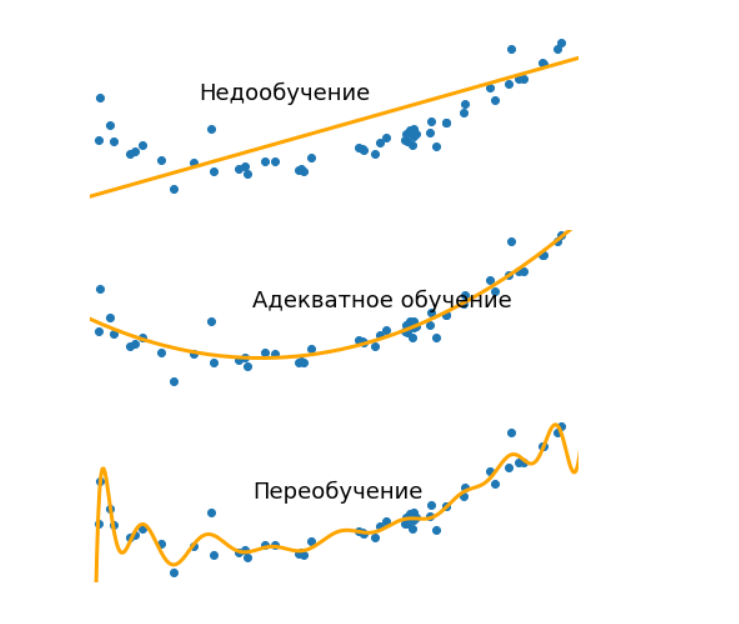

In [126]:
scores = pd.DataFrame.from_dict(data)
scores

,2,3,10
0,-0.142607,-0.155376,-0.423711
1,-2.339130,-2.203354,-2.256285
2,-0.608022,-0.771965,-0.859367
3,-0.160211,-0.236707,-1.660187
4,-0.006630,-0.008125,-3.599981


4. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [131]:
scores1 = pd.DataFrame.from_dict(data1)
scores1

,2,3,10
0,-0.142523,-0.155222,-0.409981
1,-2.338917,-2.203340,-2.256066
2,-0.597355,-0.761545,-0.859324
3,-0.159802,-0.235705,-1.606657
4,-0.004368,-0.005357,-3.288065


In [130]:
scores2 = pd.DataFrame.from_dict(data2)
scores2

,2,3,10
0,-0.075006,-0.082013,-0.170024
1,-0.929599,-0.895447,-0.904044
2,-0.284812,-0.349289,-0.379120
3,-0.081355,-0.119553,-0.449188
4,-0.002226,-0.003226,-0.548490


5. Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [132]:
time_df = pd.DataFrame.from_dict(time_dict)
time_df

,2,3,10
0,0.173335,0.181667,0.325660
1,0.178439,0.183924,0.179858
2,0.196863,0.192833,0.204710
3,0.177853,0.174864,0.222265
4,0.183576,0.181560,0.563358


Скорость полиномиальной регрессии $O(n^3)$\
Поэтому при степени = 10 количество операций существенно возрастает
